# Student Discipline Analysis in Delaware Schools

This notebook explores disciplinary actions in Delaware schools, analyzing trends, demographics, and predictive factors.

## 1. Exploring and Cleaning the Dataset

This section explores the dataset, cleans it to handle missing values, and provides an overview of trends in disciplinary actions over the years.

### Objectives:
1. **Explore**: Understand the structure of the dataset by examining columns, data types, and missing values.
2. **Clean**: Address missing or incomplete data in critical columns (`Students`, `Incidents`, `AvgDuration`) to ensure accurate analysis.
3. **Analyze Trends**:
   - Aggregate data by `School Year` to identify yearly trends in:
     - Total number of students disciplined.
     - Total number of incidents.
     - Average duration of disciplinary actions.
   - Visualize these trends over time for a better understanding of how disciplinary actions have evolved.

The results will highlight patterns across the years and help identify significant changes or anomalies (e.g., the impact of the COVID-19 pandemic on disciplinary actions).


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/mariasanchez/Downloads/student_discipline.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,School Year,District Code,District,School Code,Organization,Race,Gender,Grade,SpecialDemo,Geography,SubGroup,Category,Rowstatus,Students,Enrollment,PctEnrollment,Incidents,AvgDuration
0,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,1st Grade,All Students,All Students,Hispanic/Latino/1st Grade,In-School Suspension,REPORTED,18.0,2133.0,0.84,27.0,1.00
1,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,1st Grade,All Students,All Students,Hispanic/Latino/1st Grade,Out-of-School Suspension,REPORTED,23.0,2133.0,1.08,40.0,1.45
2,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,1st Grade,All Students,All Students,Hispanic/Latino/1st Grade,"Out-of-School Suspension, No CDAP Placement",REPORTED,23.0,2133.0,1.08,40.0,1.45
3,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,2nd Grade,All Students,All Students,Hispanic/Latino/2nd Grade,In-School Suspension,REPORTED,16.0,1898.0,0.84,22.0,1.04
4,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,2nd Grade,All Students,All Students,Hispanic/Latino/2nd Grade,Out-of-School Suspension,REPORTED,22.0,1898.0,1.16,44.0,1.34


In [7]:
# Display the structure and missing values
print("Dataset Info:")
data.info()

# Preview the first few rows
print("\nFirst Few Rows of the Dataset:")
print(data.head())

# Check for missing values in the dataset
print("\nMissing Values Per Column:")
print(data.isnull().sum())


Dataset Info:
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078668 entries, 0 to 1078667
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   School Year    1078668 non-null  int64  
 1   District Code  1078668 non-null  int64  
 2   District       1078668 non-null  object 
 3   School Code    1078668 non-null  int64  
 4   Organization   1078668 non-null  object 
 5   Race           1078668 non-null  object 
 6   Gender         1078668 non-null  object 
 7   Grade          1078668 non-null  object 
 8   SpecialDemo    1078668 non-null  object 
 9   Geography      1078668 non-null  object 
 10  SubGroup       1078668 non-null  object 
 11  Category       1078668 non-null  object 
 12  Rowstatus      1078668 non-null  object 
 13  Students       407222 no

## Data Cleaning

### Dataset Size:
The dataset contains 1,078,668 rows and 18 columns.

### Key Columns with Missing Values:

Students, Incidents, and AvgDuration: Around 62% of rows have missing values.

Enrollment: About 40% of rows have missing data.

PctEnrollment: Approximately 74% of rows have missing values.

### Other Columns:

Columns like School Year, Race, Gender, and Category are complete and can be used for analysis.

In [13]:
# Step 2: Clean the dataset
# Remove rows with missing values in critical columns
cleaned_data = data.dropna(subset=['Students', 'Incidents', 'AvgDuration'])

# Verify the cleaned dataset
print("Cleaned Dataset Info:")
cleaned_data.info()

# Preview the cleaned dataset
print("\nFirst Few Rows of Cleaned Data:")
print(cleaned_data.head())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 407222 entries, 0 to 1078667
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   School Year    407222 non-null  int64  
 1   District Code  407222 non-null  int64  
 2   District       407222 non-null  object 
 3   School Code    407222 non-null  int64  
 4   Organization   407222 non-null  object 
 5   Race           407222 non-null  object 
 6   Gender         407222 non-null  object 
 7   Grade          407222 non-null  object 
 8   SpecialDemo    407222 non-null  object 
 9   Geography      407222 non-null  object 
 10  SubGroup       407222 non-null  object 
 11  Category       407222 non-null  object 
 12  Rowstatus      407222 non-null  object 
 13  Students       407222 non-null  float64
 14  Enrollment     279971 non-null  float64
 15  PctEnrollment  279971 non-null  float64
 16  Incidents      407222 non-null  float64
 17  AvgDuration

## Trends Over the Years

This section analyzes how disciplinary actions (number of students, incidents, and average duration) have changed over time.


Yearly Trends in Disciplinary Actions:
   School Year   Students  Incidents  AvgDuration
0         2015  1076628.0  2221493.0     2.736629
1         2016  1122979.0  2368266.0     3.192749
2         2017  1108003.0  2258516.0     3.251275
3         2018  1049198.0  2073114.0     2.703856
4         2019  1020768.0  1977137.0     2.662230
5         2020   791886.0  1397328.0     2.560142
6         2021    45554.0    56278.0     7.785076
7         2022   945923.0  1684161.0     3.978814
8         2023  3899647.0  6895612.0     6.701719


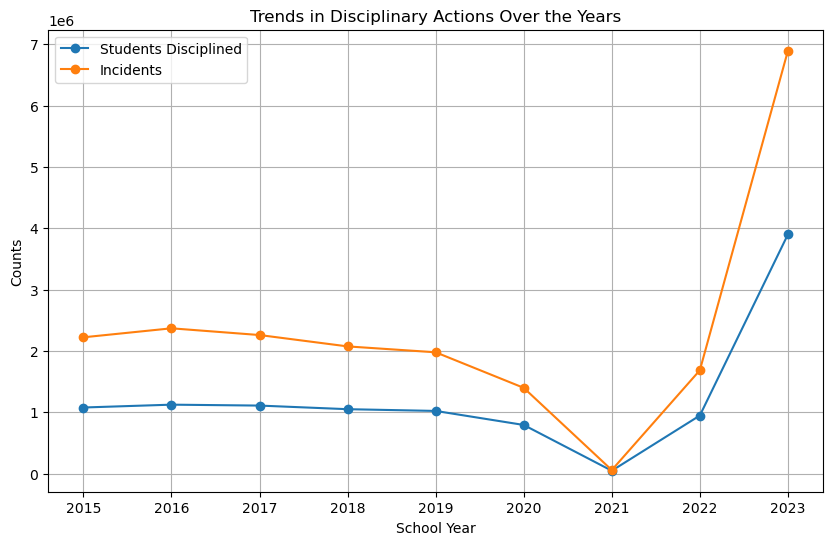

In [15]:
# Step 3: Analyze trends over the years
# Aggregate data by School Year
yearly_trends = cleaned_data.groupby('School Year').agg({
    'Students': 'sum',      # Total number of students disciplined
    'Incidents': 'sum',     # Total number of incidents
    'AvgDuration': 'mean'   # Average duration of disciplinary actions
}).reset_index()

# Display aggregated trends
print("\nYearly Trends in Disciplinary Actions:")
print(yearly_trends)

# Visualize the trends
import matplotlib.pyplot as plt

# Plot trends over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends['School Year'], yearly_trends['Students'], marker='o', label='Students Disciplined')
plt.plot(yearly_trends['School Year'], yearly_trends['Incidents'], marker='o', label='Incidents')
plt.title('Trends in Disciplinary Actions Over the Years')
plt.xlabel('School Year')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.show()


## Key Takeaways:
### Pandemic-Driven Changes: 
The drop in 2020–2021 reflects reduced disciplinary actions during remote learning. The post-pandemic increase suggests a surge in behavioral or disciplinary issues as schools returned to in-person instruction.


## 2. Gender-Based Analysis of Disciplinary Actions

This section analyzes disciplinary actions by gender to compare trends in:
- The total number of students disciplined each year.
- The total number of incidents involving male and female students.
- The average duration of disciplinary actions for each gender.

### Objectives:
- Determine if one gender is disciplined more frequently than the other.
- Examine if there are differences in the severity (average duration) of disciplinary actions.
- Visualize trends over the years for a clear comparison between male and female students.

The analysis includes:
1. Aggregating data by `Gender` and `School Year`.
2. Visualizing the trends for `Students Disciplined`, `Incidents`, and `Average Duration`.

The results will help identify patterns and disparities in how disciplinary actions are distributed across genders.



Gender-Based Trends Over the Years:
    School Year        Gender   Students  Incidents  AvgDuration
0          2015  All Students   553421.0  1133017.0     3.335429
1          2015        Female   175419.0   347425.0     2.267925
2          2015          Male   347788.0   741051.0     2.530063
3          2016  All Students   581656.0  1219464.0     4.068494
4          2016        Female   179005.0   364101.0     2.461712
5          2016          Male   362318.0   784701.0     2.901407
6          2017  All Students   578804.0  1172264.0     4.013260
7          2017        Female   174108.0   345755.0     2.574039
8          2017          Male   355091.0   740497.0     2.991852
9          2018  All Students   549299.0  1079215.0     3.163397
10         2018        Female   159328.0   304956.0     2.647357
11         2018          Male   340571.0   688943.0     2.345058
12         2019  All Students   538270.0  1034448.0     3.137883
13         2019        Female   158431.0   294971.0  

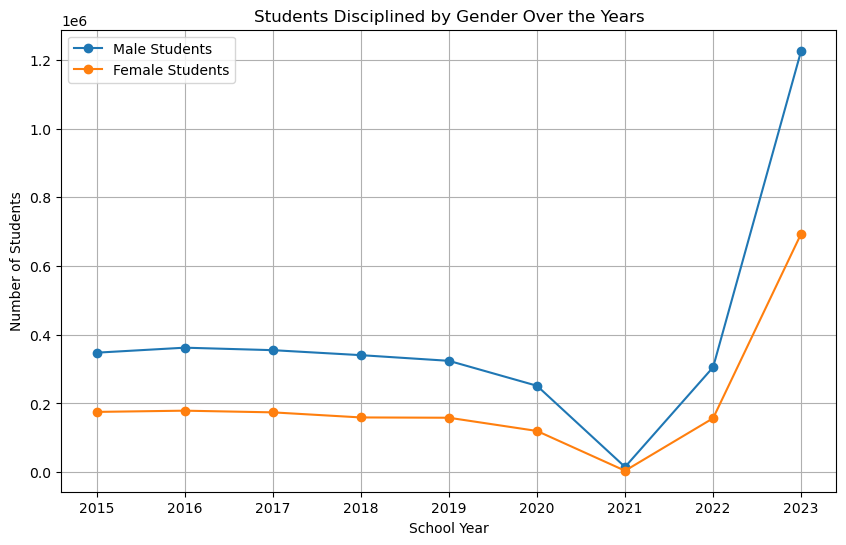

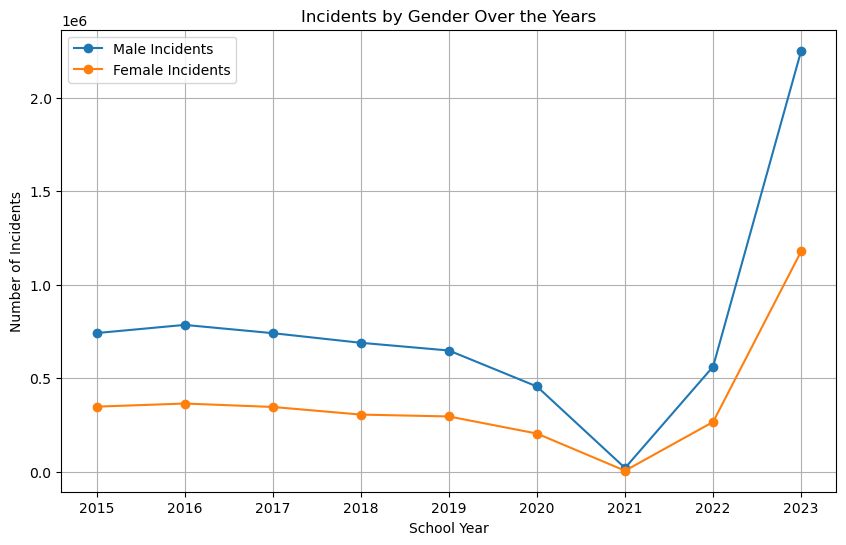

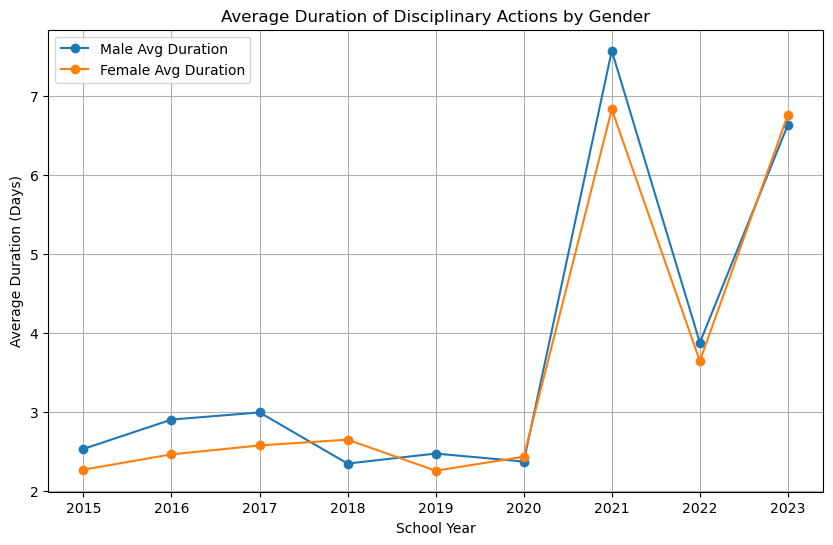

In [20]:
# Group data by Gender and School Year
gender_trends = cleaned_data.groupby(['School Year', 'Gender']).agg({
    'Students': 'sum',      # Total students disciplined
    'Incidents': 'sum',     # Total incidents
    'AvgDuration': 'mean'   # Average duration of disciplinary actions
}).reset_index()

# Display the aggregated trends
print("\nGender-Based Trends Over the Years:")
print(gender_trends)

# Visualize the trends by gender
import matplotlib.pyplot as plt

# Filter trends for males and females
male_trends = gender_trends[gender_trends['Gender'] == 'Male']
female_trends = gender_trends[gender_trends['Gender'] == 'Female']

# Plot Students Disciplined
plt.figure(figsize=(10, 6))
plt.plot(male_trends['School Year'], male_trends['Students'], marker='o', label='Male Students')
plt.plot(female_trends['School Year'], female_trends['Students'], marker='o', label='Female Students')
plt.title('Students Disciplined by Gender Over the Years')
plt.xlabel('School Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

# Plot Incidents
plt.figure(figsize=(10, 6))
plt.plot(male_trends['School Year'], male_trends['Incidents'], marker='o', label='Male Incidents')
plt.plot(female_trends['School Year'], female_trends['Incidents'], marker='o', label='Female Incidents')
plt.title('Incidents by Gender Over the Years')
plt.xlabel('School Year')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)
plt.show()

# Plot Average Duration
plt.figure(figsize=(10, 6))
plt.plot(male_trends['School Year'], male_trends['AvgDuration'], marker='o', label='Male Avg Duration')
plt.plot(female_trends['School Year'], female_trends['AvgDuration'], marker='o', label='Female Avg Duration')
plt.title('Average Duration of Disciplinary Actions by Gender')
plt.xlabel('School Year')
plt.ylabel('Average Duration (Days)')
plt.legend()
plt.grid(True)
plt.show()


## Key Takeaways:
### Higher Frequency for Males:
Male students consistently face disciplinary actions more frequently than females across all metrics.
### Severity for Females: 
Although fewer in number, females tend to face slightly longer disciplinary durations, indicating potentially more severe infractions or stricter measures.
### Post-Pandemic Surge: 
Both genders experienced a significant rise in disciplinary actions and incidents in 2023, reflecting possible behavioral adjustments as students returned to in-person learning.

## 3. Analyzing Disciplinary Actions by Special Demographics

This section examines how disciplinary actions are distributed across **special demographics**, with a focus on differences by **gender** and **race**. The goal is to determine whether specific genders or racial groups receive more or fewer disciplinary actions within each special demographic category.

### Objectives:
- **Explore Special Demographics**: Identify patterns in the number of students disciplined, total incidents, and average duration of disciplinary actions across special demographic categories.
- **Compare by Gender**: Analyze whether male or female students are disciplined more frequently or face longer durations in specific categories.
- **Compare by Race**: Investigate potential racial disparities in disciplinary actions within each special demographic.

### Approach:
1. **Aggregate Data**:
   - Group data by `SpecialDemo`, `Gender`, and `Race`.
   - Calculate the total number of students disciplined, total incidents, and average duration of disciplinary actions.

2. **Visualize Results**:
   - Use bar charts to highlight differences in disciplinary actions across genders and races for each special demographic.

This analysis provides insights into potential disparities in how disciplinary actions are distributed across various groups.


Special Demographics Trends by Gender and Race:
                    SpecialDemo        Gender  \
0            Active EL Students  All Students   
1            Active EL Students  All Students   
2            Active EL Students  All Students   
3            Active EL Students  All Students   
4            Active EL Students  All Students   
..                          ...           ...   
253  Students with Disabilities          Male   
254  Students with Disabilities          Male   
255  Students with Disabilities          Male   
256  Students with Disabilities          Male   
257  Students with Disabilities          Male   

                                 Race  Students  Incidents  AvgDuration  
0                    African American    1893.0     3455.0     4.373011  
1                        All Students   72381.0   123407.0     4.634849  
2                      Asian American     264.0      401.0     2.029405  
3                     Hispanic/Latino   11492.0    18752.0    11.78

/var/folders/rj/lwc3hbqn4cg27kn305h1_55m0000gn/T/ipykernel_10683/1589932501.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


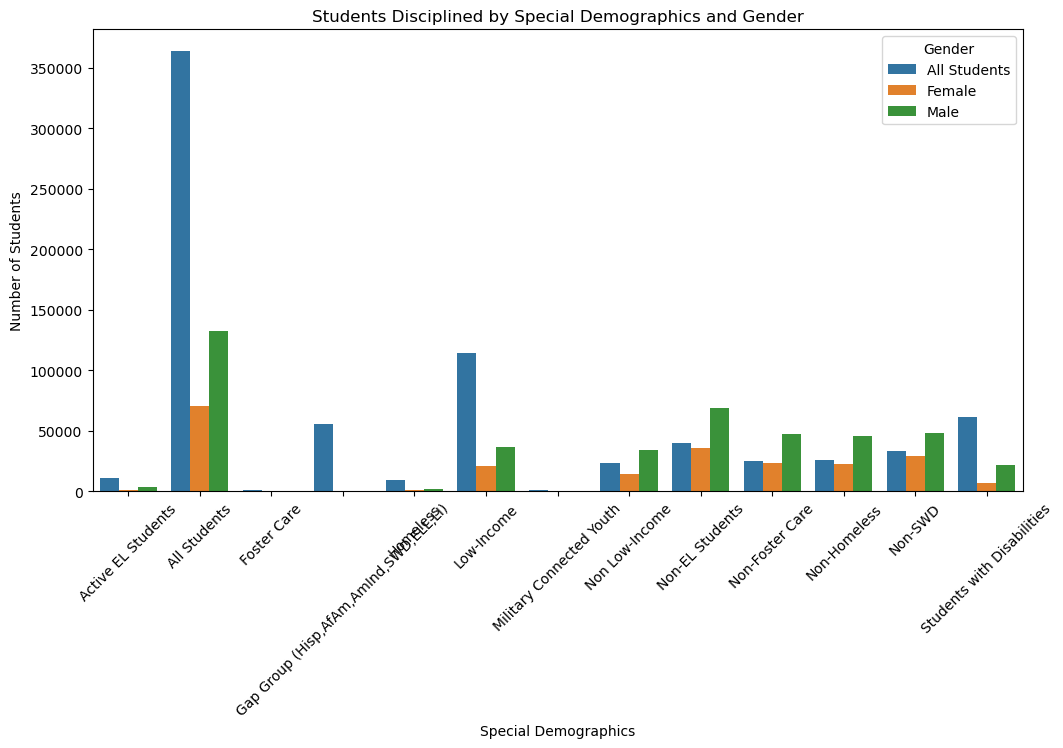

/var/folders/rj/lwc3hbqn4cg27kn305h1_55m0000gn/T/ipykernel_10683/1589932501.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


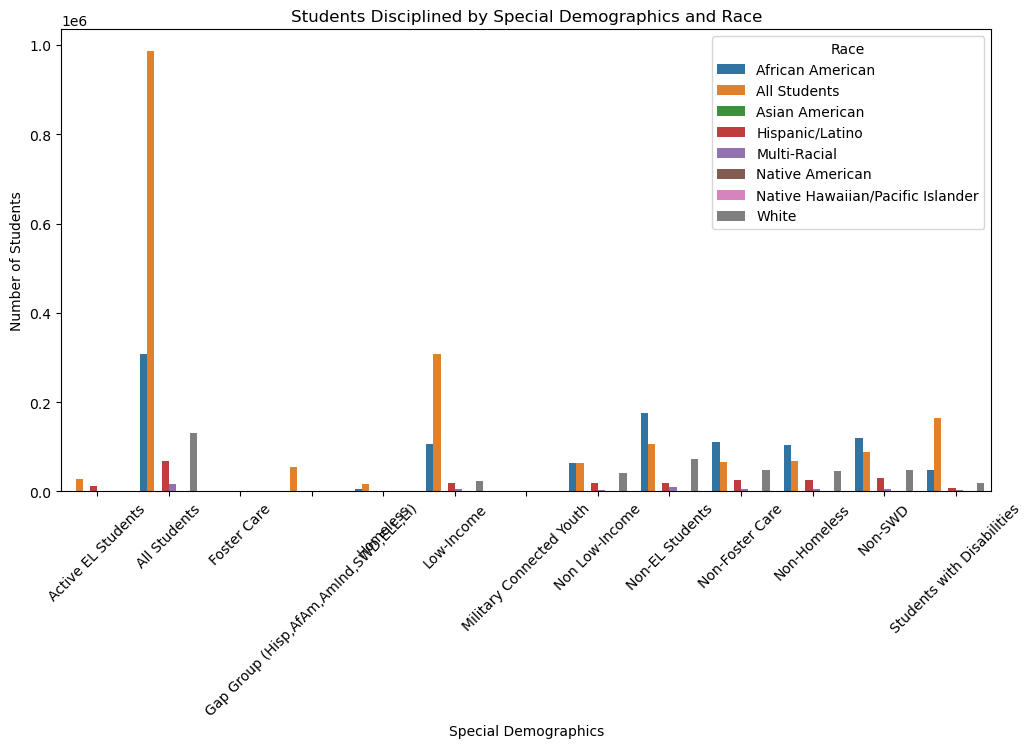

In [29]:
# Group by SpecialDemo, Gender, and Race
special_demo_trends = cleaned_data.groupby(['SpecialDemo', 'Gender', 'Race']).agg({
    'Students': 'sum',      # Total students disciplined
    'Incidents': 'sum',     # Total incidents
    'AvgDuration': 'mean'   # Average duration of disciplinary actions
}).reset_index()

# Display the aggregated table in the notebook
print("Special Demographics Trends by Gender and Race:")
print(special_demo_trends)

# Visualize the trends for Special Demographics by Gender
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization for Students disciplined by SpecialDemo and Gender
plt.figure(figsize=(12, 6))
sns.barplot(
    data=special_demo_trends,
    x='SpecialDemo',
    y='Students',
    hue='Gender',
    ci=None
)
plt.title('Students Disciplined by Special Demographics and Gender')
plt.xlabel('Special Demographics')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Example visualization for Race within SpecialDemo
plt.figure(figsize=(12, 6))
sns.barplot(
    data=special_demo_trends,
    x='SpecialDemo',
    y='Students',
    hue='Race',
    ci=None
)
plt.title('Students Disciplined by Special Demographics and Race')
plt.xlabel('Special Demographics')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.show()

## Key Takeaways:

### Gender Disparities:

Male students consistently face more disciplinary actions than female students across all special demographic categories.
Some categories, such as "Low-Income", show a particularly large gender gap.

### Racial Disparities:

African American and Hispanic/Latino students face disproportionately high disciplinary actions in categories like "Low-Income" and "Non-SWD", suggesting potential inequities.

### Special Demographic Influence:

Certain categories like "Low-Income" and "Non-SWD" dominate disciplinary actions overall, highlighting these groups as potentially more vulnerable to disciplinary measures.

## 4. Assessing When and for Whom Reports Were "Redacted"

This section examines patterns in redacted disciplinary reports to answer two key questions:
1. **When did redacted reports occur?**
   - Identify the distribution of redacted reports across school years.
2. **For whom were reports redacted?**
   - Analyze redactions by gender, race, and special demographics.

### Objectives:
- **Temporal Trends**:
  - Determine how the number of redacted reports has changed over the years.
  - Identify years with significant increases or decreases in redacted reports.

- **Demographic Disparities**:
  - Assess whether certain genders or racial groups are more likely to have reports redacted.
  - Investigate if specific special demographic categories (e.g., "Low-Income", "Students with Disabilities") are associated with higher levels of redactions.

### Approach:
1. Filter the dataset for rows where the `Rowstatus` column equals `"REDACTED"`.
2. Aggregate redacted reports by:
   - **School Year**: For temporal analysis.
   - **Gender** and **Race**: To highlight demographic trends.
   - **Special Demographics**: To understand redaction patterns in key groups.
3. Visualize the results with bar charts to make trends and disparities clear.

This analysis provides insights into how and for whom disciplinary data is being redacted, helping to uncover potential privacy considerations or equity issues.



Redacted Reports by Year and Gender:
   School Year        Gender  Count
0         2021  All Students   3090
1         2021        Female   1449
2         2021          Male   3209
3         2022  All Students   9173
4         2022        Female   8946
5         2022          Male  13514
6         2023  All Students  34775
7         2023        Female  21892
8         2023          Male  31203

Redacted Reports by Race:
                               Race  Count
0                  African American  31780
1                      All Students  36082
2                    Asian American   2635
3                   Hispanic/Latino  17989
4                      Multi-Racial  12224
5                   Native American   2000
6  Native Hawaiian/Pacific Islander    834
7                             White  23707

Redacted Reports by Special Demographics:
                  SpecialDemo  Count
0          Active EL Students   5842
1                All Students  28261
2                  Low-Income  187

/var/folders/rj/lwc3hbqn4cg27kn305h1_55m0000gn/T/ipykernel_10683/1300096623.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=redacted_by_year_gender, x='School Year', y='Count', hue='Gender', ci=None)


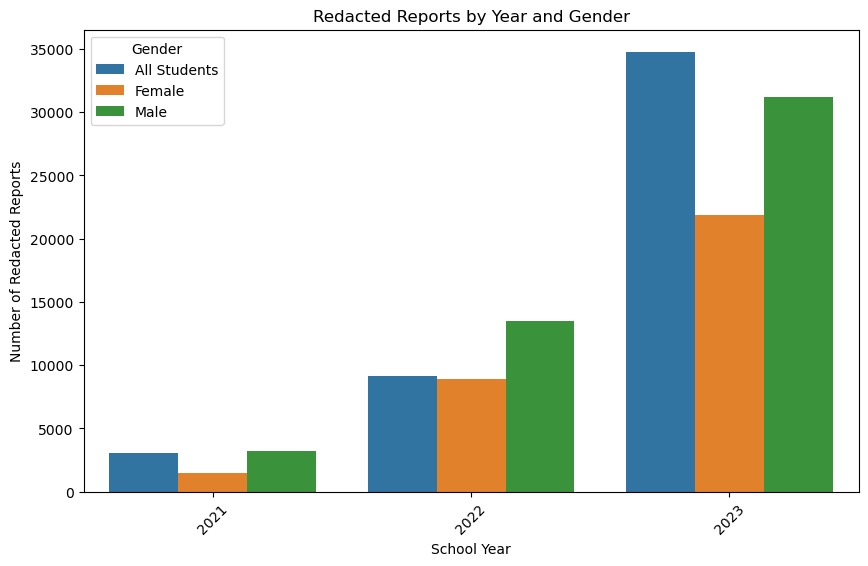

/var/folders/rj/lwc3hbqn4cg27kn305h1_55m0000gn/T/ipykernel_10683/1300096623.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=redacted_by_race, x='Race', y='Count', ci=None)


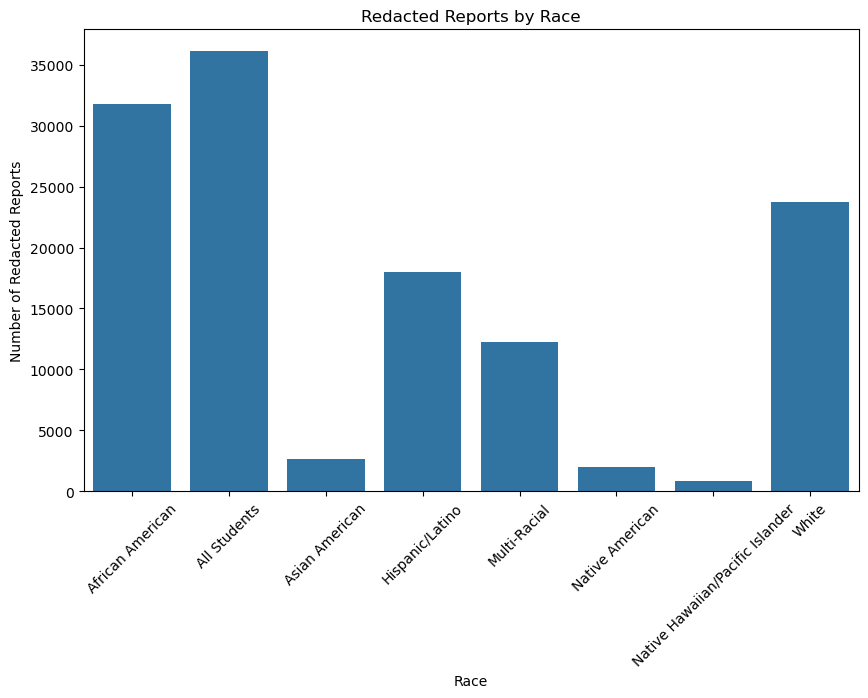

/var/folders/rj/lwc3hbqn4cg27kn305h1_55m0000gn/T/ipykernel_10683/1300096623.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=redacted_by_specialdemo, x='SpecialDemo', y='Count', ci=None)


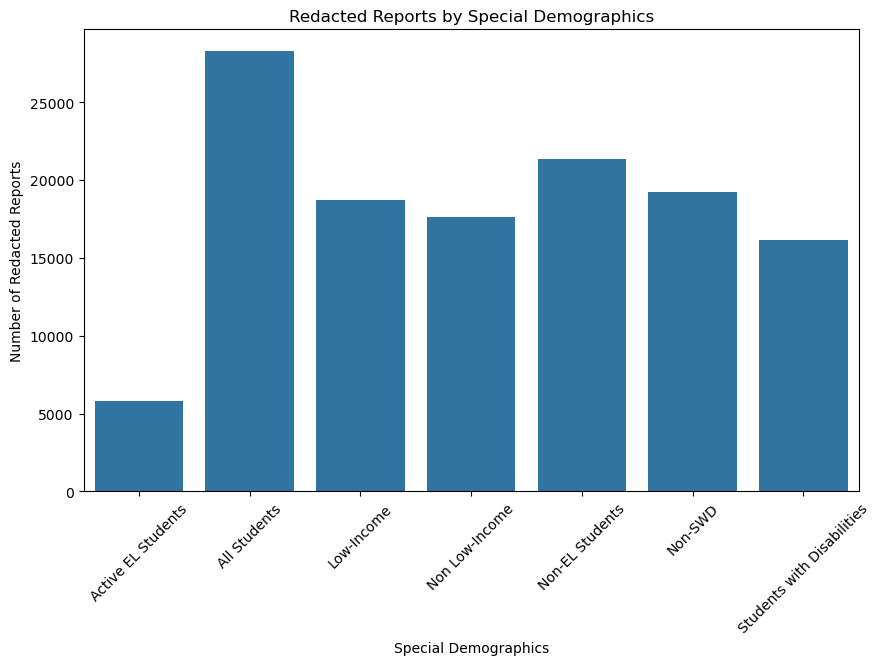

In [34]:
# Step 1: Filter rows with "REDACTED" in Rowstatus
redacted_data = cleaned_data[cleaned_data['Rowstatus'] == 'REDACTED']

# Step 2: Analyze redacted reports by School Year, Gender, and Race
# Group by School Year and Gender
redacted_by_year_gender = redacted_data.groupby(['School Year', 'Gender']).size().reset_index(name='Count')

# Group by Race
redacted_by_race = redacted_data.groupby(['Race']).size().reset_index(name='Count')

# Group by SpecialDemo
redacted_by_specialdemo = redacted_data.groupby(['SpecialDemo']).size().reset_index(name='Count')

# Display tables
print("\nRedacted Reports by Year and Gender:")
print(redacted_by_year_gender)

print("\nRedacted Reports by Race:")
print(redacted_by_race)

print("\nRedacted Reports by Special Demographics:")
print(redacted_by_specialdemo)

# Step 3: Visualize the patterns

import matplotlib.pyplot as plt
import seaborn as sns

# Redacted by Year and Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=redacted_by_year_gender, x='School Year', y='Count', hue='Gender', ci=None)
plt.title('Redacted Reports by Year and Gender')
plt.xlabel('School Year')
plt.ylabel('Number of Redacted Reports')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

# Redacted by Race
plt.figure(figsize=(10, 6))
sns.barplot(data=redacted_by_race, x='Race', y='Count', ci=None)
plt.title('Redacted Reports by Race')
plt.xlabel('Race')
plt.ylabel('Number of Redacted Reports')
plt.xticks(rotation=45)
plt.show()

# Redacted by Special Demographics
plt.figure(figsize=(10, 6))
sns.barplot(data=redacted_by_specialdemo, x='SpecialDemo', y='Count', ci=None)
plt.title('Redacted Reports by Special Demographics')
plt.xlabel('Special Demographics')
plt.ylabel('Number of Redacted Reports')
plt.xticks(rotation=45)
plt.show()


## Key Takeaways:

### White Students:

With 23,707 redactions, White students rank second after African American students. This reflects their higher representation but also raises questions about how redactions are applied.

### Non-EL Students:

The 21,365 redacted reports for Non-EL students indicate this group faces the highest redaction levels among special demographics.

### Disparities in Redactions:

African American and Hispanic/Latino students experience disproportionately high redaction levels relative to smaller racial groups.
Groups like Low-Income Students and Students with Disabilities also stand out, suggesting targeted redactions.

In [47]:
# Step 1: Prepare the data
# Select relevant features and target variable
features = ['Gender', 'Race', 'Grade', 'SpecialDemo', 'School Year']
target = 'Category'

# Drop rows with missing values in selected features or target
data_for_model = cleaned_data.dropna(subset=features + [target])

# Ensure only selected features are used
data_for_model = data_for_model[features + [target]]

# One-hot encode categorical features
data_encoded = pd.get_dummies(data_for_model, columns=features, drop_first=True)

# Split data into features (X) and target (y)
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# Encode the target variable (Category) into numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.4760041582424059

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.34      0.14      0.19     30326
           2       0.39      0.35      0.37     36881
           3       0.17      0.00      0.00      2851
           4       0.61      1.00      0.76     33505
           5       0.35      0.41      0.38     18459

    accuracy                           0.48    122167
   macro avg       0.31      0.32      0.28    122167
weighted avg       0.43      0.48      0.42    122167



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


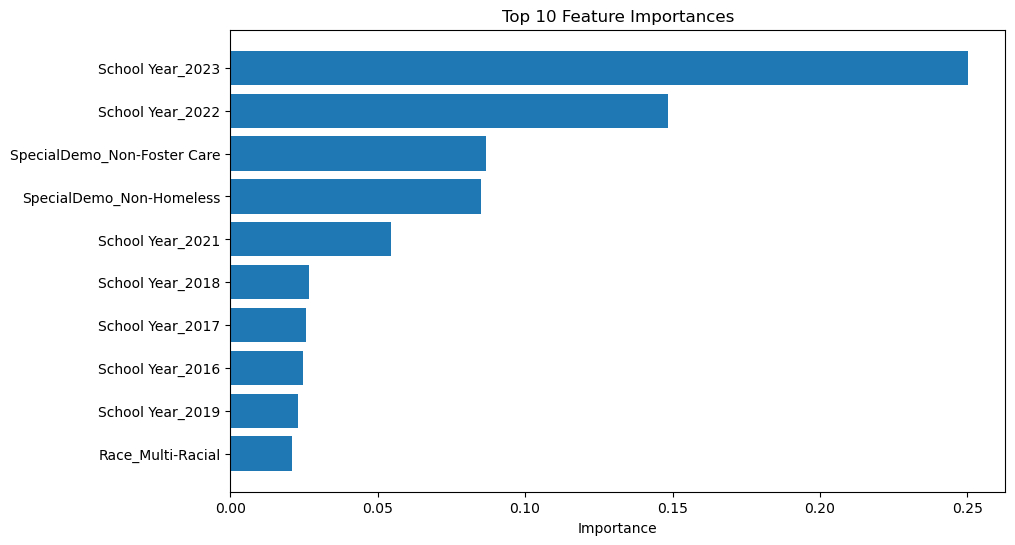

In [53]:
import numpy as np
import numpy as np  # Ensure NumPy is imported
import matplotlib.pyplot as plt

# Analyze Feature Importance
importance = model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(importance)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importance = importance[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], sorted_importance[:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()


## Key Takeaways from the Model

### 1. Model Performance
- **Accuracy**: The model achieved an accuracy of **47.6%**, correctly predicting nearly half of the disciplinary outcomes.
- **Class Performance**:
  - **Class 4** (most common type of discipline) had the highest precision (**61%**) and recall (**100%**).
  - Other classes had lower precision and recall, indicating challenges with class imbalance.

### 2. Feature Importance
- **School Year Effects**:
  - The top features were **`School Year_2023`** and **`School Year_2022`**, showing that disciplinary outcomes vary significantly by year.
- **Special Demographics**:
  - Features like **`SpecialDemo_Non-Foster Care`** and **`SpecialDemo_Non-Homeless`** were highly predictive, reflecting the influence of demographics.
- **Racial Influence**:
  - **`Race_Multi-Racial`** appeared as an important factor, highlighting the role of race in disciplinary outcomes.

### 3. Insights and Observations
- **Temporal Trends**: Recent years play a significant role in predicting discipline type, likely due to policy or cultural shifts.
- **Demographic Factors**: Students in certain categories (e.g., non-homeless, non-foster care) showed distinct patterns in discipline outcomes.
- **Racial Disparities**: The influence of race suggests the need for further investigation into potential inequities.

### 4. Limitations and Recommendations
- **Class Imbalance**: The model struggled with underrepresented classes, limiting its ability to generalize.
- **Feature Gaps**: Additional data (e.g., behavioral history, type of incidents) could improve predictions.
- **Lack of Tuning**: Hyperparameter tuning was not performed, leaving potential model performance untapped.

**Recommendations**:
- Address class imbalance with oversampling or undersampling techniques.
- Incorporate additional features to capture complex patterns.
- Perform hyperparameter tuning to optimize the model for better performance.


## Final Summary of Findings

### Key Trends and Insights:
1. **Disciplinary Trends Over Time**:
   - The number of disciplinary actions fluctuated over the years, with notable increases in recent years (e.g., 2023).
   - Incidents and average durations of disciplinary actions showed a sharp rise post-2021, likely reflecting changes in policies or societal factors.

2. **Gender-Based Disparities**:
   - Male students were disciplined significantly more often than females across all years.
   - While the gender gap persisted, the overall trend mirrored the rise in disciplinary actions for all students.

3. **Special Demographics and Race**:
   - Certain groups, such as African American and Hispanic/Latino students, faced disproportionately higher disciplinary actions.
   - Special demographics like "Low-Income" and "Students with Disabilities" were associated with higher disciplinary rates.

4. **Redacted Reports**:
   - The high redaction rate for **White students**, despite fewer incidents, contrasts with **African American students**, who have both high incidents and redactions.
   - Special demographic groups such as "Non-EL Students" and "Low-Income Students" also saw higher redaction rates.

5. **Predicting Discipline Type**:
   - The model achieved an accuracy of **47.6%**, with school year and special demographics being the most influential factors.
   - The model highlighted potential disparities, particularly by race and special demographics, but struggled with underrepresented classes.

---

### Recommendations:
1. **Address Inequities**:
   - Investigate racial and demographic disparities in disciplinary actions to ensure fairness.
2. **Improve Reporting**:
   - Standardize reporting practices to reduce the need for redactions and improve data quality.
3. **Refine Predictive Modeling**:
   - Future analyses should address class imbalance, add more granular features (e.g., behavioral data), and use optimized models for better accuracy.
